### Kepler Q1 - Q16 Stellar Table Analysis

Github Project Repository: https://github.com/Fl4v/Statistical-Data-Analysis-with-Machine-Learning

I will be briefly explore Kepler's q1 - q16 stellar table. The table contains parameters of targets obeserved by Kepler, whose purpose is to find transiting planets. Full definition of each parameter can be found on NASA's exoplanet archive documentation: https://exoplanetarchive.ipac.caltech.edu/docs/API_keplerstellar_columns.html and the data, which was collected in 2013 can be found on NASA's exoplanet archive API: https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html

The dataset contains a total of 198918 observations.

Variables of interest:
```
stellar_temperature: Stellar effective temperature in Kelvin;
radius: The photospheric radius of the start;
mass: Mass of the star;
dens: Density of the star;
exoplanets_in_system: Number of exoplanets confirmed in the system;
objects_of_interest_in_system: Number of Kepler objects of interested identified in the system.
```
Few things to keep in mind:

- The dataset presents a certain degree of uncertainty, for the purposes of this analysis, this uncertainty has been ignored;
- Some parameters from the original dataset have been removed for this analysis;
- Even though the dataset contains 198918 observations, not all of them are actual stars/systems.

In [1]:
import pandas as pd
import os

DATASETS = os.path.join('datasets')


def data(file_path: str):
    csv_path = os.path.join(DATASETS, file_path)
    return pd.read_csv(csv_path)

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from preprocessing import data

class ExploratoryDataAnalysis:
    attributes = []

    def __init__(self, data_frame):
        self.data_frame = data_frame
        [self.attributes.append(attr) for attr in data_frame]

        for attr in self.attributes:
            if self.data_frame.dtypes[attr] == 'object':
                print('Looks like there is a categorical attribute: {categorical_attribute}'.format(categorical_attribute=attr))
                user_input = input('Would you like to perform a count on this attribute? [y/n]: ')
                if user_input == 'y':
                    print(self.value_count(attr))

    def info(self):
        return self.data_frame.info()

    def describe(self):
        return self.data_frame.describe()

    def histogram(self):
        self.data_frame.hist(bins=50, figsize=(15, 10))
        plt.show()

    def value_count(self, attribute: list):
        return self.data_frame[attribute].value_counts()
    
    def correlation(self):
        return self.data_frame.corr()

    def corr_matrix(self):
        scatter_matrix(self.data_frame, figsize=(12, 8))
        plt.show()

In [4]:
analysis = ExploratoryDataAnalysis(data('q1_q16_stellar_clean.csv'))

analysis.describe()

,stellar_temperature,radius,mass,dens,exoplanets_in_system,objects_of_interest_in_system
count,198917.000000,198917.000000,196468.000000,1.964680e+05,198917.000000,198917.000000
mean,5680.636150,3.300348,1.103845,1.742132e+00,0.011839,0.048060
std,815.783812,11.270100,0.529712,3.390545e+00,0.149824,0.255512
min,2500.000000,0.104000,0.086400,1.930000e-07,0.000000,0.000000
25%,5207.000000,0.832000,0.845600,6.395000e-01,0.000000,0.000000
50%,5778.000000,0.997000,0.985200,1.453000e+00,0.000000,0.000000
75%,6147.000000,1.345000,1.118800,2.152000e+00,0.000000,0.000000
max,27730.000000,300.749000,3.735700,1.240000e+02,8.000000,7.000000


From the above output, it is clear that most most of the stars obeserved by the Kepler telescope have no exoplanets nor any objects are present in the system (i.e. asteroids). 50% of 198917 observed stars have an effective Kelvin termperature similar to our sun (5777) and a very similar radius of 1 Solar Radii or 695,700Km. The biggest observed star in this dataset is approx 300 times the size of our sun, which comes under the category of a Red Supergiant Star.

In [5]:
analysis.correlation()

,stellar_temperature,radius,mass,dens,exoplanets_in_system,objects_of_interest_in_system
stellar_temperature,1.000000,-0.320015,0.148317,-0.326829,-0.007615,0.016949
radius,-0.320015,1.000000,0.385216,-0.116000,-0.016091,-0.028532
mass,0.148317,0.385216,1.000000,-0.322028,-0.026139,-0.033818
dens,-0.326829,-0.116000,-0.322028,1.000000,0.011673,0.005637
exoplanets_in_system,-0.007615,-0.016091,-0.026139,0.011673,1.000000,0.619946
objects_of_interest_in_system,0.016949,-0.028532,-0.033818,0.005637,0.619946,1.000000


From the correlation analysis we can see a slight correlation between the stellar temperature and the mass, also objects of interests are directly correlated to the number of exoplanets in the solar system, which makes sense thinking about it. This is further reinforced by the below correlation matrix. An upward trend is somewhat visible between the temperature and the mass, altough this is not great. The trend between exoplanets and objects is much better, but still not great.

Perphas this linearity would have been better and much more visible had the dataset been split according to the star type, i.e. Yellow Dwarf, Orange Dwarf etc. etc.

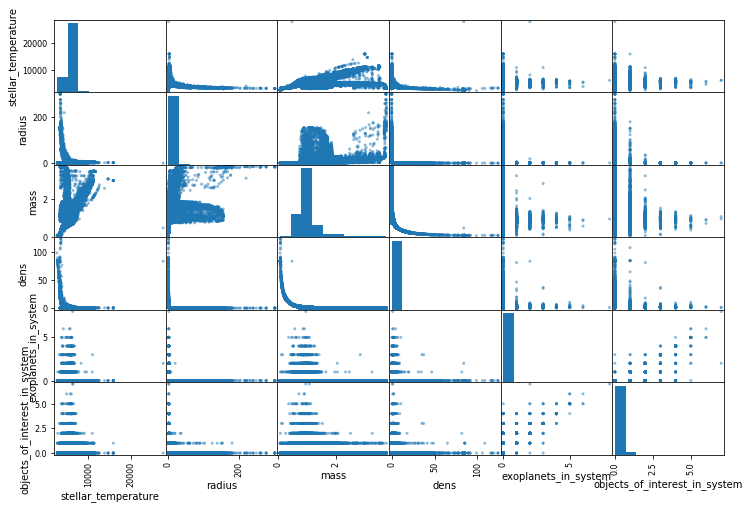

In [6]:
%matplotlib inline
analysis.corr_matrix()

Now, let's train a linear regression model to predict the surface temperature of the star based on the mass. First, let's quickly clean the attributes by replacing the missing values with the median value.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load linear regression model
linear_regression = LinearRegression()

# Attach data to variable
stellar_data = data('q1_q16_stellar_clean.csv')

# Claculate the median for each attribute and replace n/a with the latter
mass_median = stellar_data['mass'].median()
stellar_temperature_median = stellar_data['stellar_temperature'].median()

stellar_data['mass'].fillna(mass_median, inplace=True)
stellar_data['stellar_temperature'].fillna(stellar_temperature_median, inplace=True)

# Set X and y
X = stellar_data['mass'].values.reshape(-1, 1)
y = stellar_data['stellar_temperature'].values.reshape(-1,1)

# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the algorithm
stellar_data_regression = linear_regression.fit(X_train, y_train)

# Predict y using the training dataset set aside for this purpose
y_pred = stellar_data_regression.predict(X_test)

# Compare side to side actual vs predicted values
actual_v_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual_v_predicted

,Actual,Predicted
0,3286,5688.285755
1,7048,5838.218192
2,5284,5591.135655
3,5185,5614.826960
4,5339,5602.385087
...,...,...
39779,5697,5628.168787
39780,7037,5751.867548
39781,5006,5598.560280
39782,4421,5547.037879
